

---

### In this notebook, we'll be conducting an exploratory data analysis (EDA) to gain insights from the data.
### Our data is spread across multiple files, so we'll need to combine them into a single dataset and add two new columns: one for city and one for day type. This will allow us to differentiate the information from each file and work with the data effectively.
Kaggle: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=london_weekends.csv

Original authors of the datasets: https://zenodo.org/record/4446043#.Y9Y9ENJBwUE


---



In [ ]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

path = r'/content/Airbnb' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    # Extract city name and day type from filename
    city, day_type = os.path.splitext(os.path.basename(filename))[0].split('_')
    city = city.capitalize()
    # Read in CSV file and add city and day type columns
    df = pd.read_csv(filename, index_col=None, header=0)
    df.insert(0, 'day_type', day_type)
    df.insert(0, 'city', city)
    # Add DataFrame to list
    li.append(df)

# Concatenate all DataFrames in list
df = pd.concat(li, axis=0, ignore_index=True)

# Save the resulting DataFrame to a new CSV file
df.to_csv('merged.csv', index=False)

In [ ]:
df.head()

,city,day_type,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,Paris,weekdays,0,296.159940,Private room,False,True,2.0,True,0,...,97.0,1,0.699821,0.193709,518.478947,25.239380,1218.662228,71.608028,2.35385,48.86282
1,Paris,weekdays,1,288.237487,Private room,False,True,2.0,True,0,...,97.0,1,2.100005,0.107221,873.216962,42.507907,1000.543327,58.791463,2.32436,48.85902
2,Paris,weekdays,2,211.343089,Private room,False,True,2.0,False,0,...,94.0,1,3.302325,0.234724,444.556077,21.640840,902.854467,53.051310,2.31714,48.87475
3,Paris,weekdays,3,298.956100,Entire home/apt,False,False,2.0,False,0,...,91.0,1,0.547567,0.195997,542.142014,26.391291,1199.184166,70.463506,2.35600,48.86100
4,Paris,weekdays,4,247.926181,Entire home/apt,False,False,4.0,False,0,...,82.0,1,1.197921,0.103573,406.928958,19.809165,1070.775497,62.918272,2.35915,48.86648


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        51707 non-null  object 
 1   day_type                    51707 non-null  object 
 2   Unnamed: 0                  51707 non-null  int64  
 3   realSum                     51707 non-null  float64
 4   room_type                   51707 non-null  object 
 5   room_shared                 51707 non-null  bool   
 6   room_private                51707 non-null  bool   
 7   person_capacity             51707 non-null  float64
 8   host_is_superhost           51707 non-null  bool   
 9   multi                       51707 non-null  int64  
 10  biz                         51707 non-null  int64  
 11  cleanliness_rating          51707 non-null  float64
 12  guest_satisfaction_overall  51707 non-null  float64
 13  bedrooms                    517

In [ ]:
df.columns

Index(['city', 'day_type', 'Unnamed: 0', 'realSum', 'room_type', 'room_shared',
       'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')



---


### An interesting observation is that Amsterdam has the smallest inventory of rentals and, at the same time, the highest average price.


---



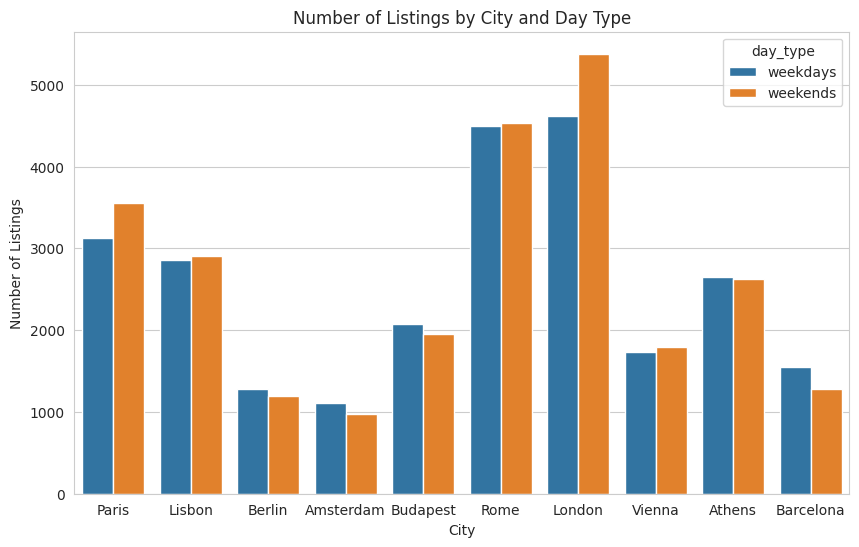

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='city', hue='day_type')

plt.title('Number of Listings by City and Day Type')
plt.xlabel('City')
plt.ylabel('Number of Listings')

plt.show()

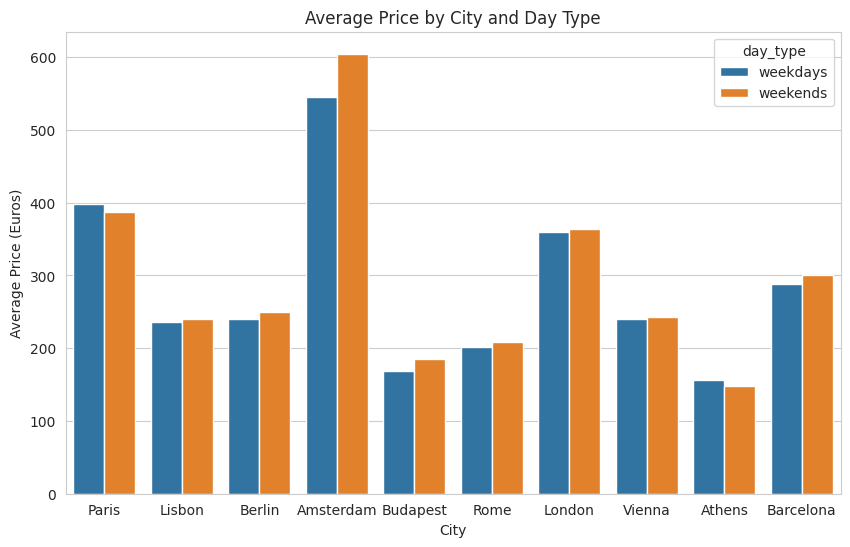

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(data=df, x='city', y='realSum', hue='day_type', errorbar=None)

plt.title('Average Price by City and Day Type')
plt.xlabel('City')
plt.ylabel('Average Price (Euros)')

plt.show()



---


### Although one might assume that there is a correlation between the supply and average price in Amsterdam, the correlation in all the cities is actually only -0.04.
### This suggests that there are other factors that contribute to the high prices in Amsterdam, as evidenced by the heatmap below.

---





---
### Another approach to investigate the relationship between the distance from the city center and the rental prices for each city.
### However, there seems to be little to no correlation between the two variables.


---





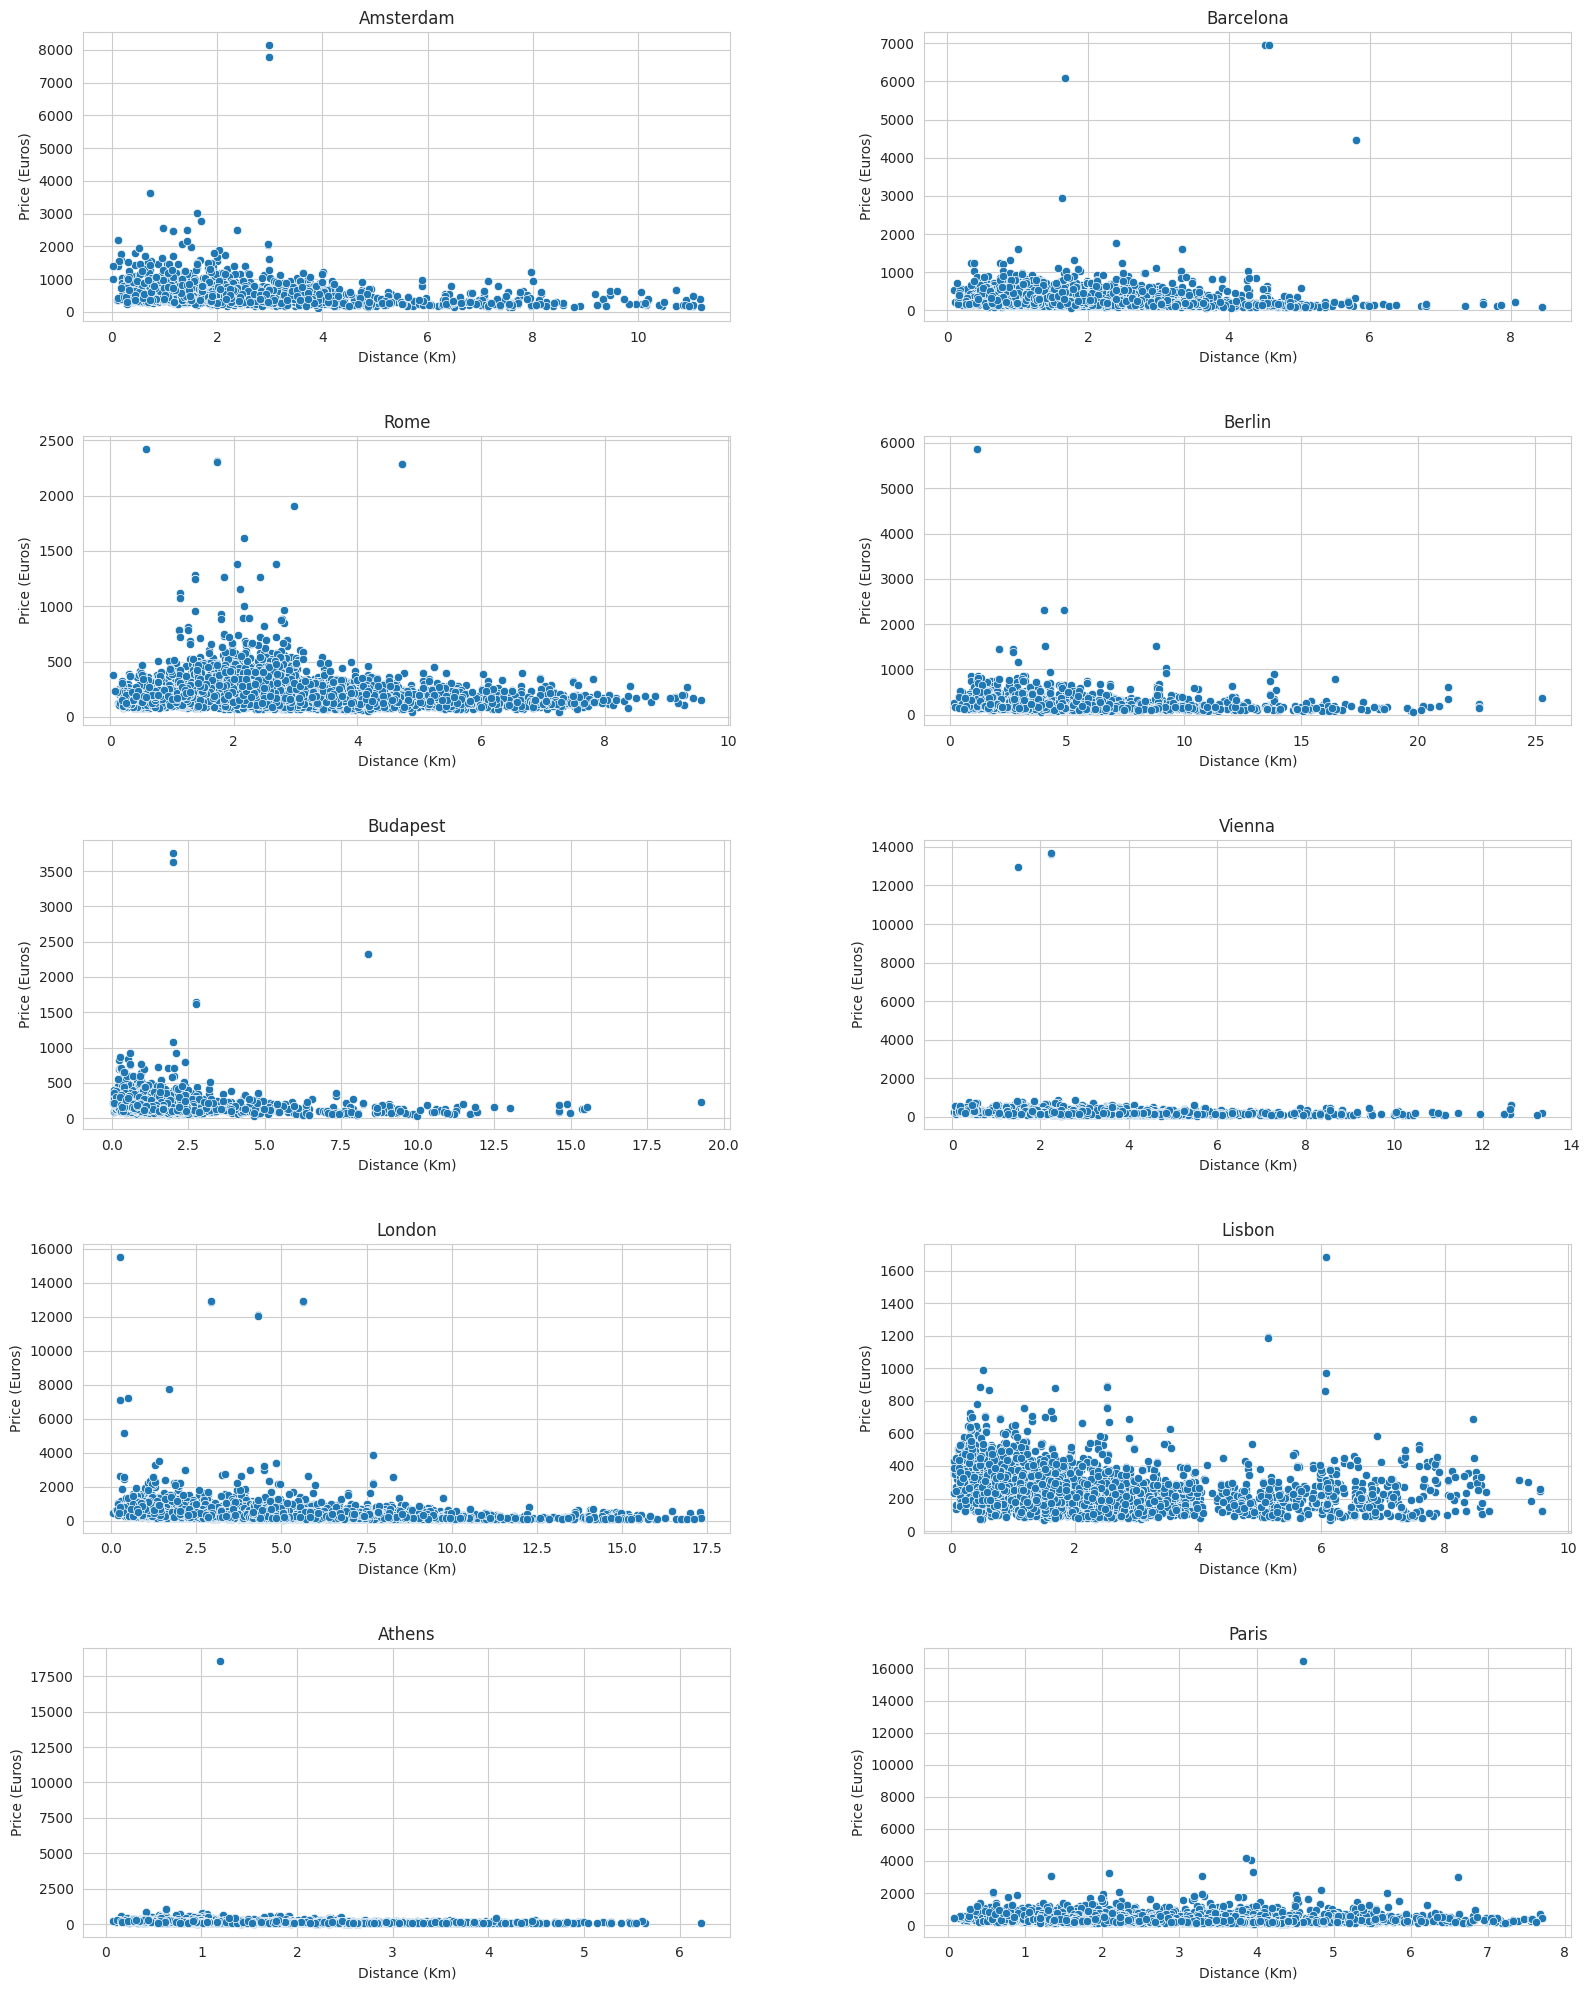

In [ ]:
# Define the cities for the subplot grid
cities = ['Amsterdam', 'Barcelona', 'Rome', 'Berlin', 'Budapest', 'Vienna', 'London', 'Lisbon', 'Athens', 'Paris']

# Create a subplot grid with a scatter plot for each city
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
for i, city in enumerate(cities):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.scatterplot(data=df[df['city'] == city], x='dist', y='realSum', ax=ax)
    ax.set_title(city)
    ax.set_xlabel('Distance (Km)')
    ax.set_ylabel('Price (Euros)')
    
# Adjust the layout and spacing of the subplots
fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.3)

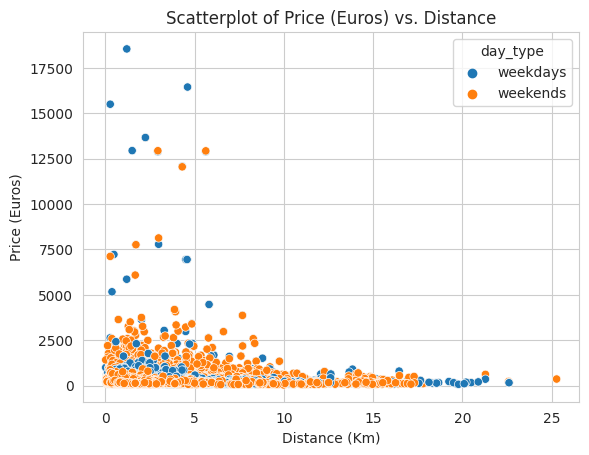

In [ ]:
sns.scatterplot(data=df, x='dist', y='realSum', hue='day_type')
plt.title('Scatterplot of Price (Euros) vs. Distance')
plt.xlabel('Distance (Km)')
plt.ylabel('Price (Euros)')
plt.show()



---
### The price appears to be somewhat affected by factors such as the number of bedrooms, the distance to attractions, and the availability of nearby restaurants.
### And the level of guest satisfaction is highly correlated with cleanliness (0.71) and, to a lesser extent, with being a super host (0.28).


---




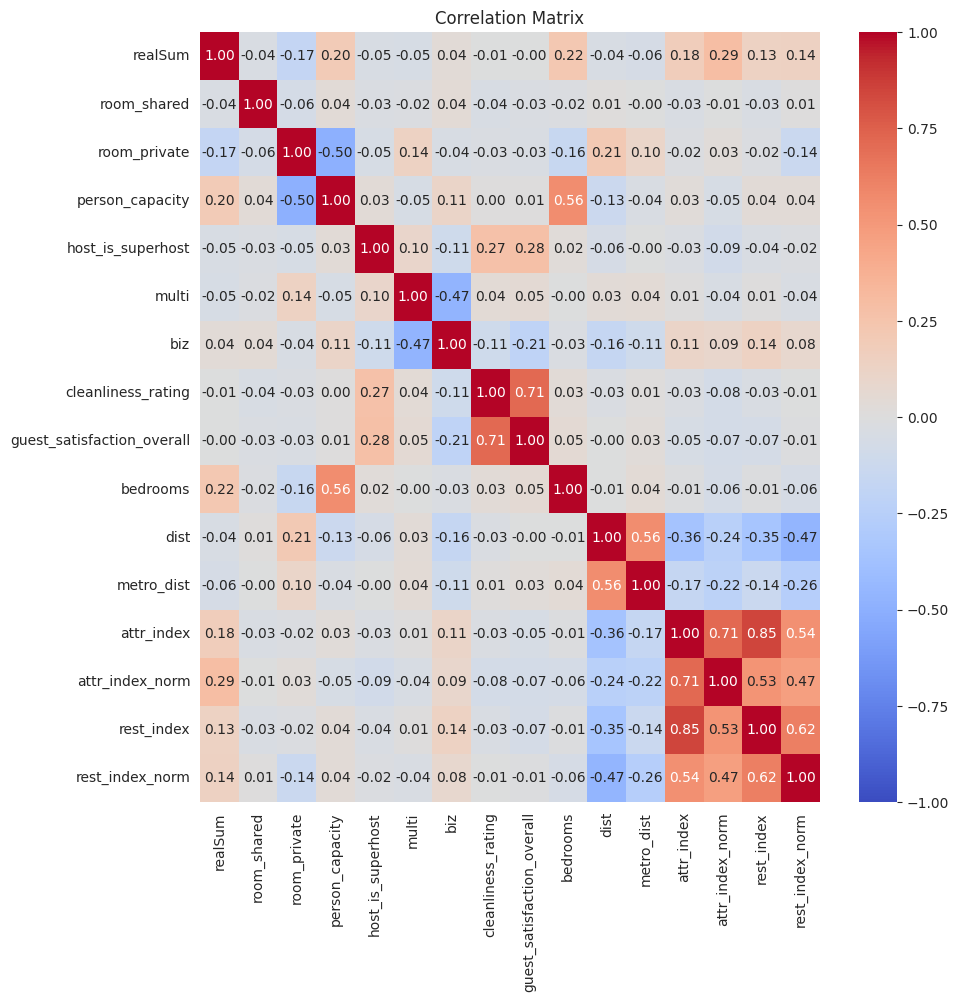

In [ ]:
# Select columns for correlation matrix
cols = ['realSum', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']

# Create correlation matrix
corr = df[cols].corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()





---


### Most cities show little variability in the interquartile range, except for Amsterdam, London, and Paris.


---



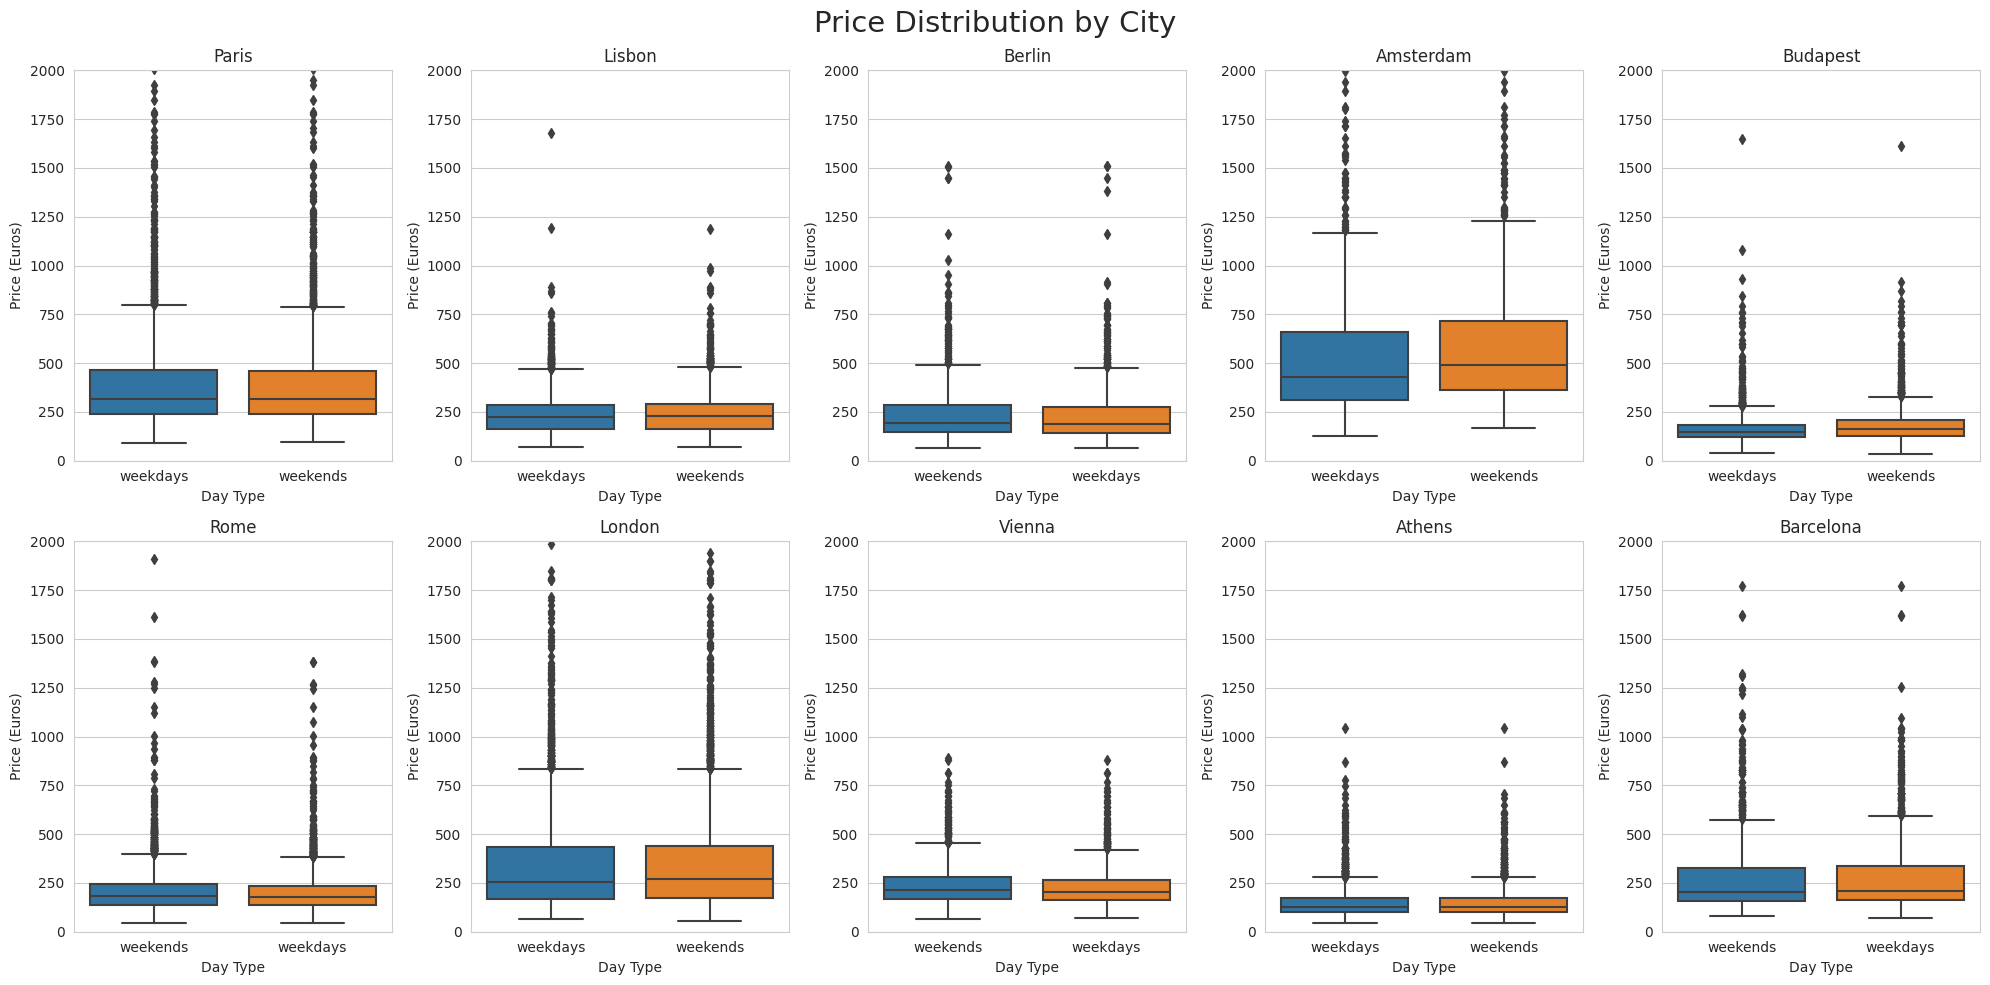

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for i, city in enumerate(df['city'].unique()):
    ax = axes[i//5, i%5]
    sns.boxplot(data=df[df['city']==city], x='day_type', y='realSum', ax=ax)
    ax.set_title(city)
    ax.set_ylim([0, 2000])
    ax.set_xlabel('Day Type')
    ax.set_ylabel('Price (Euros)')

fig.suptitle('Price Distribution by City', fontsize=21)
fig.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()




---


### A large portion of the rental offerings in London and Berlin are situated at a considerable distance from the city center.


---



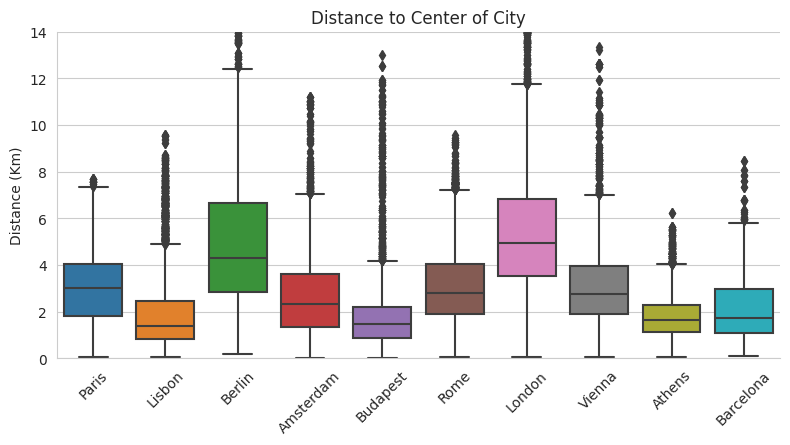

In [ ]:
g = sns.catplot(data=df, kind='box', x='city', y='dist', aspect=2, height=4)
g.set_xticklabels(rotation=45)
g.set_titles(row_template='{row_name}', fontweight='bold')

# Set title for each subplot
titles = ['Distance to Center of City']
for ax, title in zip(g.axes.reshape(-1), titles * len(g.axes)):
    ax.set(title=title)
    ax.set_ylim([0, 14])  # Set y-axis limits
    ax.set_ylabel('Distance (Km)')

g.set_xlabels('')
plt.show()



---
### When it comes to the distance to a metro station, Paris has the shortest. While Amsterdam, Rome, and London have a large variability, with some listings being as far as 1 km away.


---




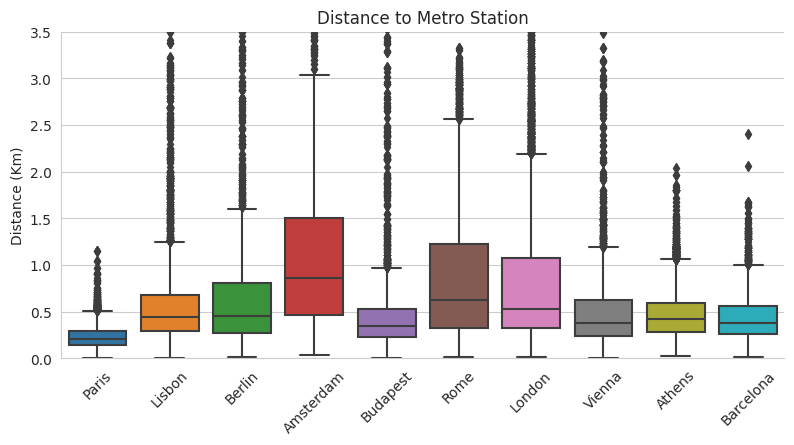

In [ ]:
g = sns.catplot(data=df, kind='box', x='city', y='metro_dist', aspect=2, height=4)
g.set_xticklabels(rotation=45)
g.set_titles(row_template='{row_name}', fontweight='bold')

# Set title for each subplot
titles = ['Distance to Metro Station']
for ax, title in zip(g.axes.reshape(-1), titles * len(g.axes)):
    ax.set(title=title)
    ax.set_ylim([0, 3.5])  # Set y-axis limits
    ax.set_ylabel('Distance (Km)')
g.set_xlabels('')
plt.show()



---
### While most cities tend to feature entire apartments or homes as the predominant type of rental, Barcelona distinguishes itself with a higher prevalence of private rooms available for rent.


---




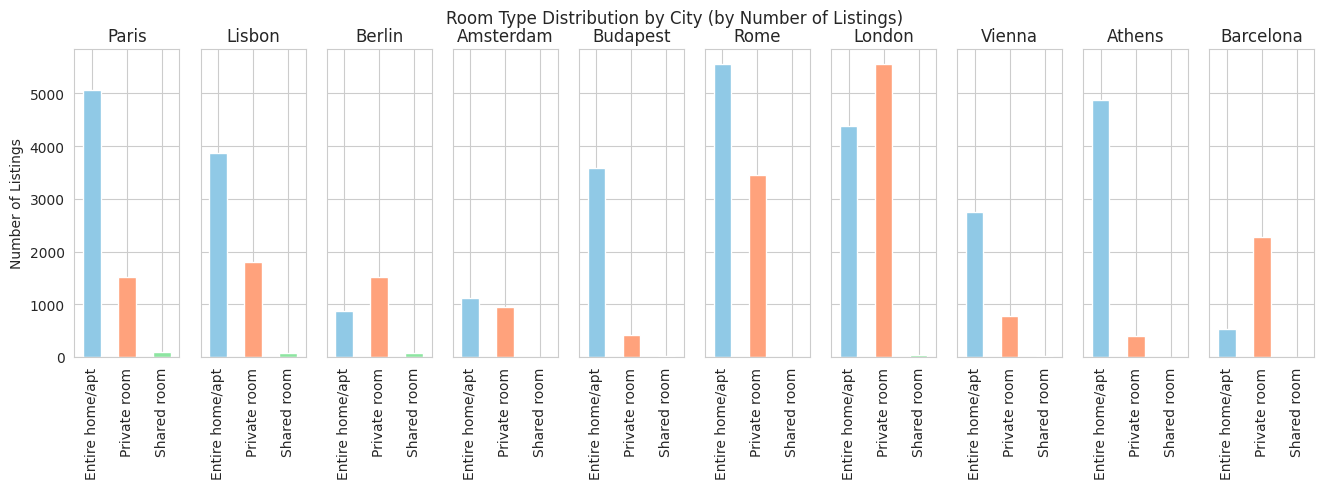

In [ ]:
# Get unique cities in the data
cities = df['city'].unique()

# Define color palette
colors = ["#90c9e6", "#ffa27c", "#8de5a1"]

# Define the order of the room types
room_type_order = ['Entire home/apt', 'Private room', 'Shared room']

# Create a bar plot for each city
fig, axes = plt.subplots(nrows=1, ncols=len(cities), figsize=(16, 4), sharey=True)
for ax, city in zip(axes.flat, cities):
    city_data = df.loc[df['city'] == city, 'room_type']
    room_type_count = city_data.value_counts().loc[room_type_order]
    room_type_count.plot(kind='bar', ax=ax, color=colors)
    ax.set(title=city.capitalize(), xlabel='', ylabel='Number of Listings')

# Set title for entire figure
fig.suptitle('Room Type Distribution by City (by Number of Listings)')

plt.show()


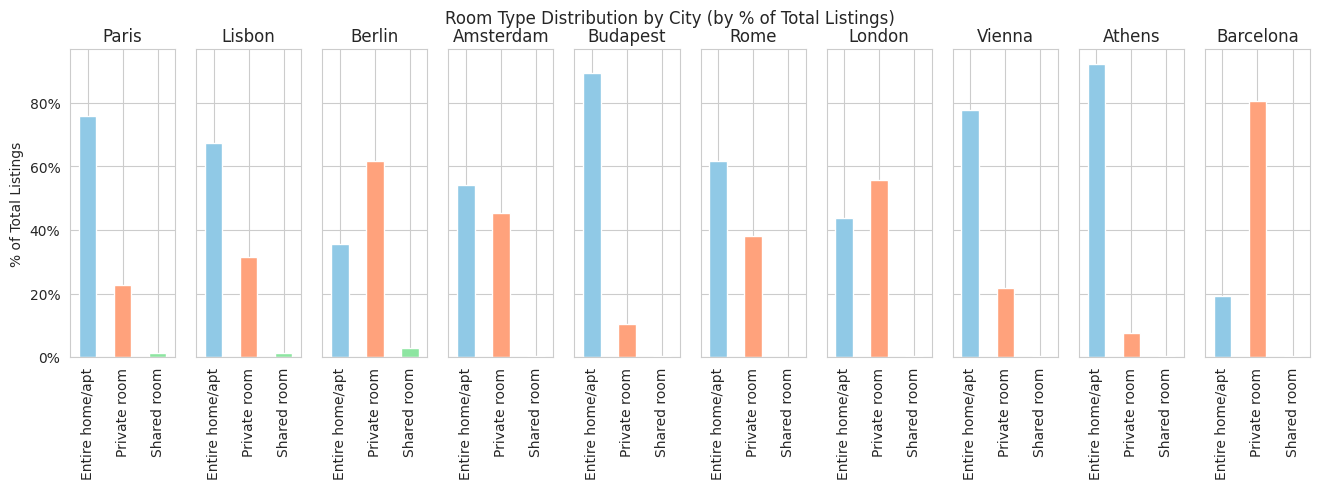

In [ ]:
# Get unique cities in the data
cities = df['city'].unique()

# Define color palette
colors = ["#90c9e6", "#ffa27c", "#8de5a1"]

# Define the order of the room types
room_type_order = ['Entire home/apt', 'Private room', 'Shared room']

# Create a bar plot for each city
fig, axes = plt.subplots(nrows=1, ncols=len(cities), figsize=(16, 4), sharey=True)
for ax, city in zip(axes.flat, cities):
    city_data = df.loc[df['city'] == city, 'room_type']
    room_type_count = city_data.value_counts().loc[room_type_order]
    room_type_perc = room_type_count / room_type_count.sum() * 100
    room_type_perc.plot(kind='bar', ax=ax, color=colors)
    ax.set(title=city.capitalize(), xlabel='', ylabel='% of Total Listings')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set title for entire figure
fig.suptitle('Room Type Distribution by City (by % of Total Listings)')

plt.show()




---
### Two-bedroom accommodations represent the most commonly available rental option across all cities.


---





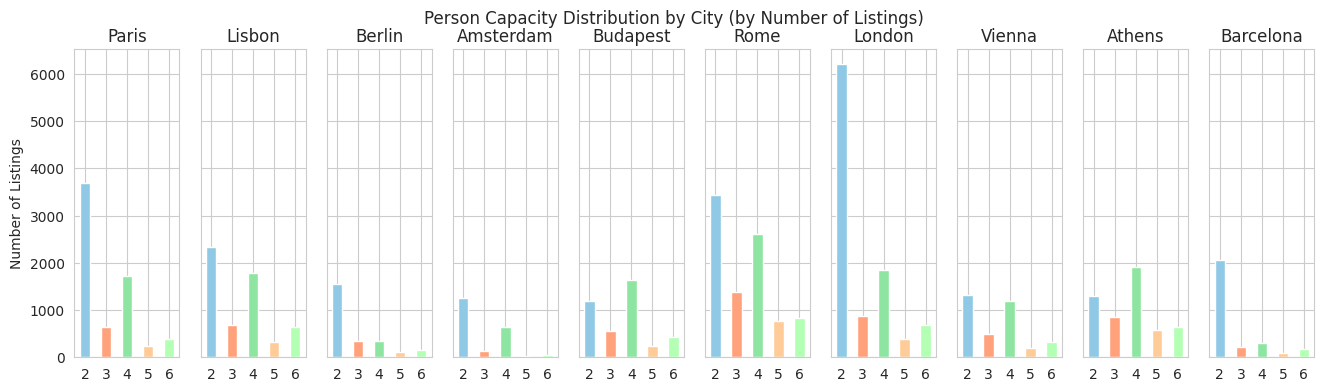

In [ ]:
# Get unique cities in the data
cities = df['city'].unique()

# Define color palette
colors = ["#90c9e6", "#ffa27c", "#8de5a1", "#ffcc99", "#b3ffb3"]

# Define the order of the person capacities
capacity_order = [2, 3, 4, 5, 6]

# Create a bar plot for each city
fig, axes = plt.subplots(nrows=1, ncols=len(cities), figsize=(16, 4), sharey=True)
for ax, city in zip(axes.flat, cities):
    city_data = df.loc[df['city'] == city, 'person_capacity']
    capacity_count = city_data.value_counts().loc[capacity_order]
    capacity_count.plot(kind='bar', ax=ax, color=colors)
    ax.set(title=city.capitalize(), xlabel='', ylabel='Number of Listings')
    ax.set_xticklabels([int(c) for c in capacity_order], rotation=0)  # convert capacity_order to integers

# Set title for entire figure
fig.suptitle('Person Capacity Distribution by City (by Number of Listings)')

plt.show()


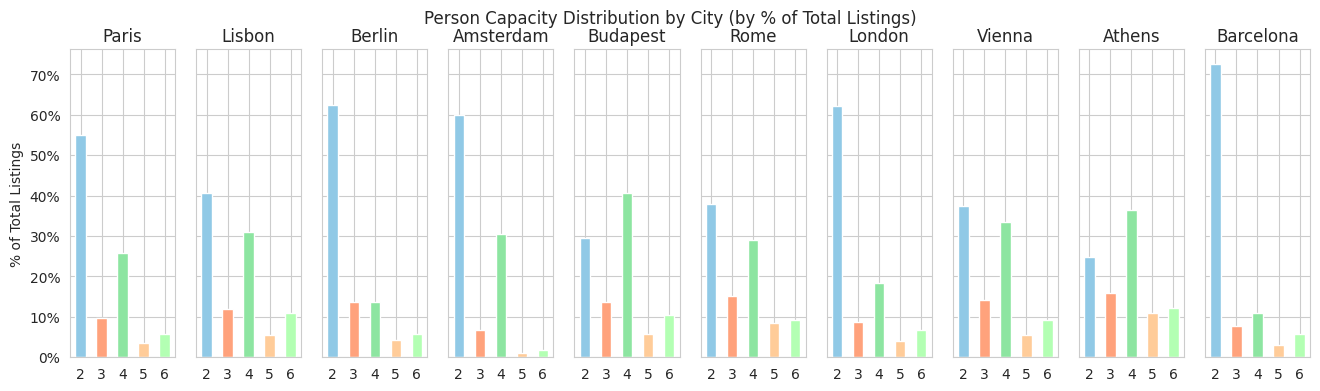

In [ ]:
# Get unique cities in the data
cities = df['city'].unique()

# Define color palette
colors = ["#90c9e6", "#ffa27c", "#8de5a1", "#ffcc99", "#b3ffb3"]

# Define the order of the person capacities
capacity_order = [2, 3, 4, 5, 6]

# Create a bar plot for each city
fig, axes = plt.subplots(nrows=1, ncols=len(cities), figsize=(16, 4), sharey=True)
for ax, city in zip(axes.flat, cities):
    city_data = df.loc[df['city'] == city, 'person_capacity']
    capacity_count = city_data.value_counts().loc[capacity_order]
    capacity_perc = capacity_count / capacity_count.sum() * 100
    capacity_perc.plot(kind='bar', ax=ax, color=colors)
    ax.set(title=city.capitalize(), xlabel='', ylabel='% of Total Listings')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xticklabels([int(c) for c in capacity_order], rotation=0)  # convert capacity_order to integers

# Set title for entire figure
fig.suptitle('Person Capacity Distribution by City (by % of Total Listings)')

plt.show()




---


### Follow this Tableau link to explore the variation in prices across different areas:
https://public.tableau.com/views/AirbnbPricesinEuropeanCities_16808826073980/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link



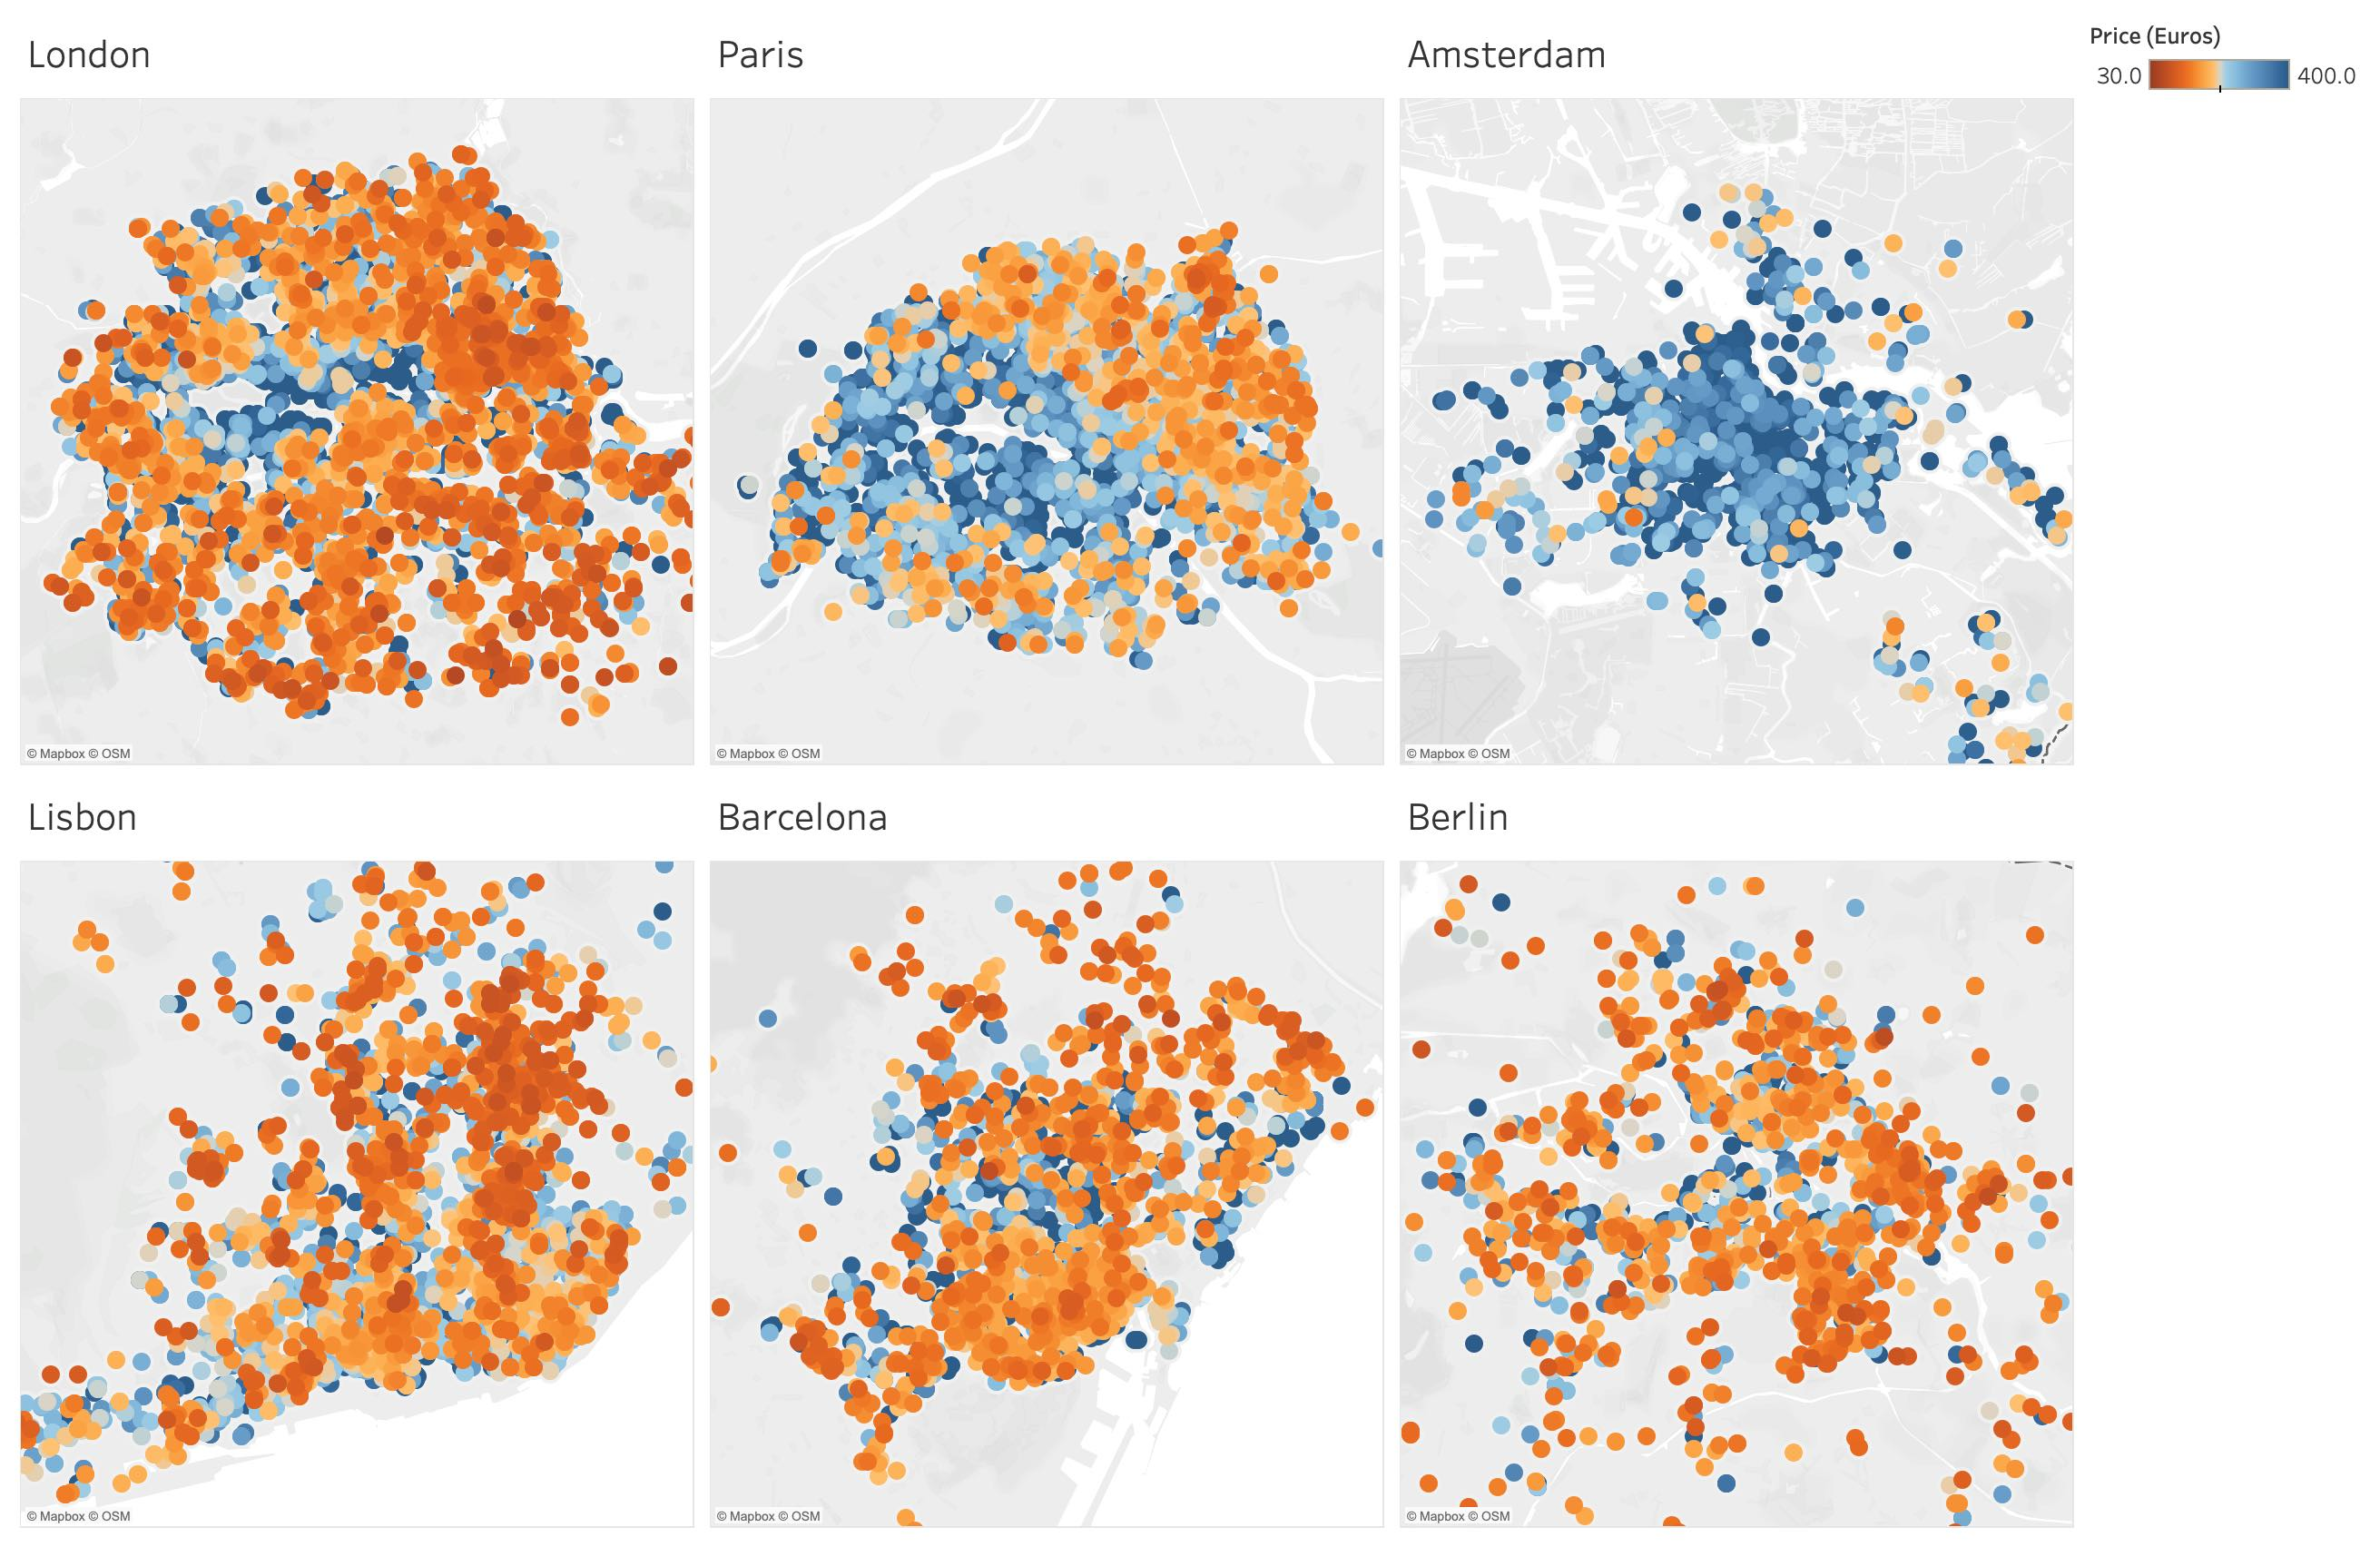

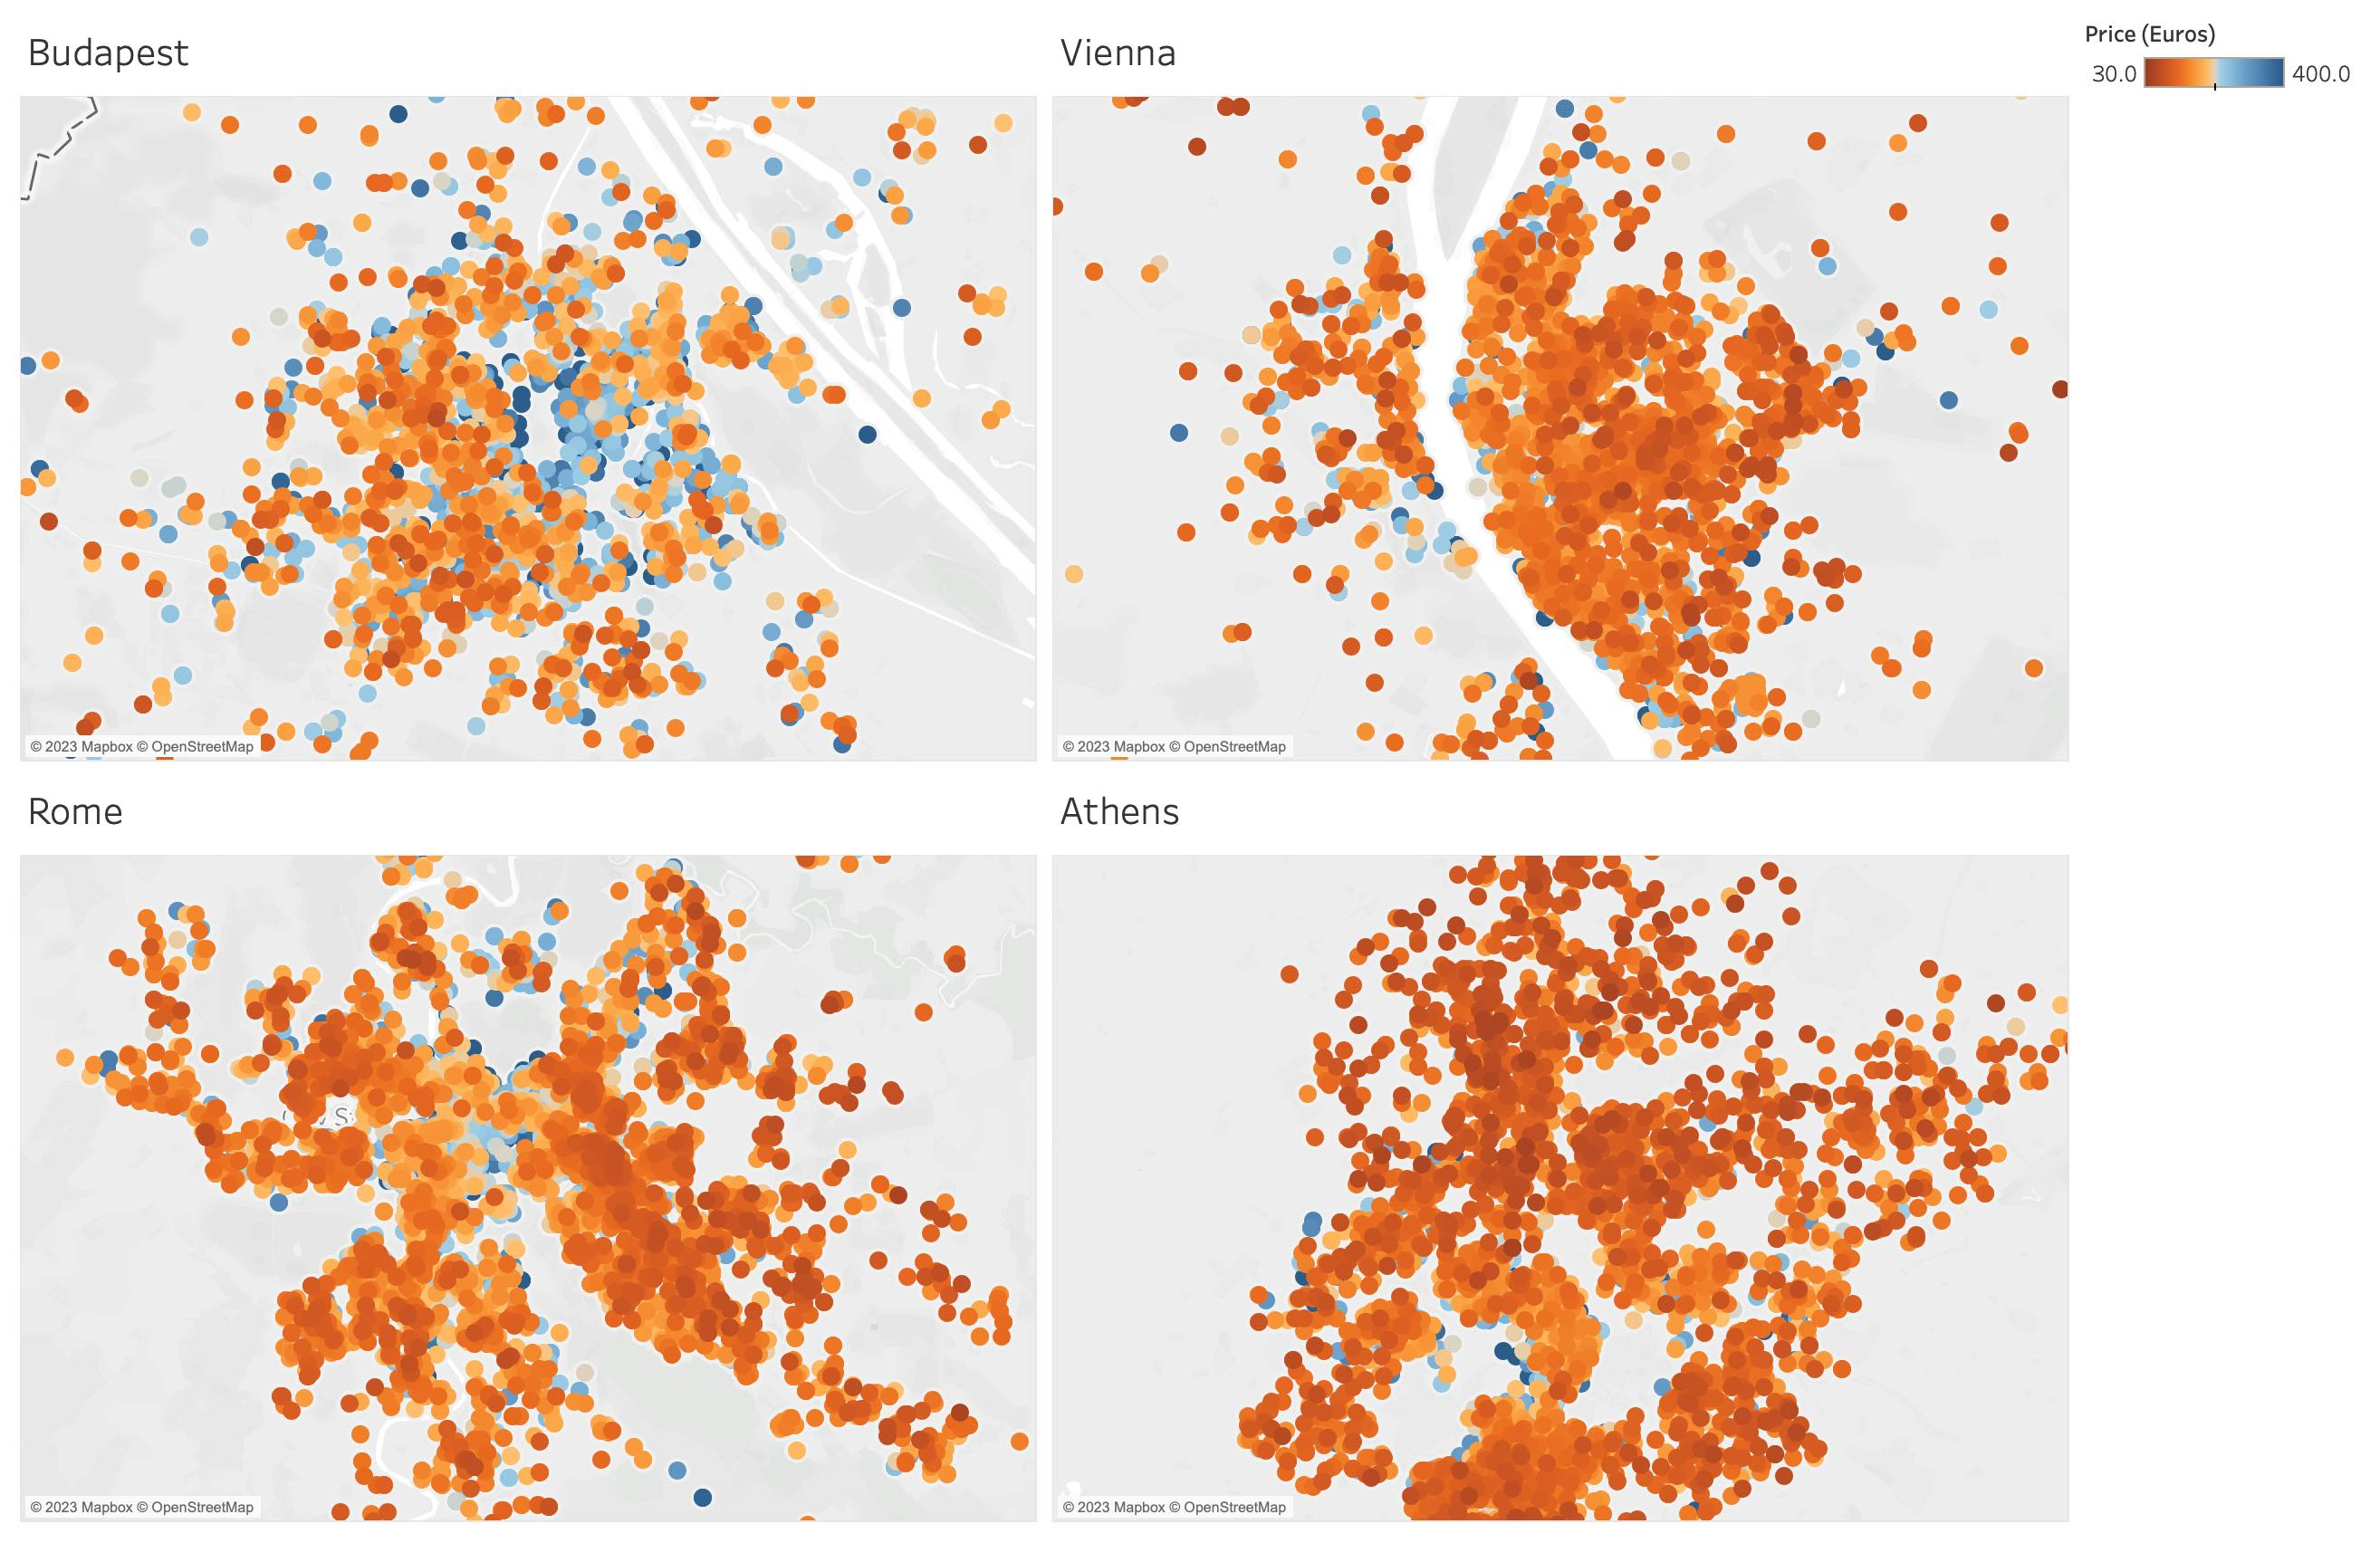